# Import Data

It’s simple: given an image, classify it as a digit.

Each image in the MNIST dataset is 28x28 and contains a centered, grayscale digit. We’ll flatten each 28x28 into a 784 dimensional vector, which we’ll use as input to our neural network. Our output will be one of 10 possible classes: one for each digit.

In [0]:
from keras.datasets import mnist

In [0]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [46]:
x_train.shape

(60000, 28, 28)

In [47]:
x_train[0].shape

(28, 28)

In [48]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

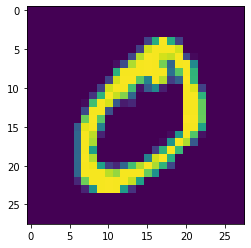

In [49]:
from matplotlib import pyplot as plt
plt.imshow(x_train[1])

In [50]:
y_train.shape

(60000,)

In [51]:
y_train[1]

0

In [0]:
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [53]:
x_train.shape

(60000, 784)

As mentioned earlier, we need to flatten each image before we can pass it into our neural network.

We’ll also normalize the pixel values from [0, 255] to [0, 1] to make our network easier to train (using smaller, centered values is often better).

In [0]:
# Normalize images
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [55]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [0]:
# convert class vectors to binary class matrices
from keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [57]:
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Create NN model

Every Keras model is either built using the Sequential class, which represents a linear stack of layers, or the functional Model class, which is more customizeable. 

We’ll be using the simpler Sequential model, since our network is indeed a linear stack of layers.

The Sequential constructor takes an array of Keras Layers. Since we’re just building a standard feedforward network, we only need the Dense layer, which is your regular fully-connected (dense) network layer.

The last thing we always need to do is tell Keras what our network’s input will look like. We can do that by specifying an input_shape to the first layer in the Sequential model:

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [0]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

Once the input shape is specified, Keras will automatically infer the shapes of inputs for later layers. 

We’ve finished defining our model! Here’s where we’re at:

In [60]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


# Compile NN model

Before we can begin training, we need to configure the training process. We decide 3 key factors during the compilation step:

* The **optimizer**. We’ll stick with a pretty good default: the Adam gradient-based optimizer. Keras has many other optimizers you can look into as well

* The **loss function.** Since we’re using a Softmax output layer, we’ll use the Cross-Entropy loss. Keras distinguishes between binary_crossentropy (2 classes) and categorical_crossentropy (>2 classes), so we’ll use the latter.

* A list of metrics. Since this is a classification problem, we’ll just have Keras report on the accuracy metric.

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

# Train NN model

Training a model in Keras literally consists only of calling fit() and specifying some parameters. There are a lot of possible parameters, but we’ll only manually supply a few:

* The training data (images and labels), commonly known as X and Y, respectively.
* The number of epochs (iterations over the entire dataset) to train for.
* The batch size (number of samples per gradient update) to use when training.

We can also use the testing dataset for validation during training. Keras will evaluate the model on the validation set at the end of each epoch and report the loss and any metrics we asked for. This allows us to monitor our model’s progress over time during training, which can be useful to identify overfitting and even support early stopping.

In [62]:
history = model.fit(x_train, y_train,
                    batch_size=16,
                    epochs=5,
                    verbose=1,
                    validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 12s 255us/step - loss: 0.2359 - acc: 0.9284 - val_loss: 0.1207 - val_acc: 0.9645
Epoch 2/5
48000/48000 [==============================] - 12s 242us/step - loss: 0.1229 - acc: 0.9632 - val_loss: 0.1120 - val_acc: 0.9677
Epoch 3/5
48000/48000 [==============================] - 12s 241us/step - loss: 0.0972 - acc: 0.9706 - val_loss: 0.0869 - val_acc: 0.9752
Epoch 4/5
48000/48000 [==============================] - 12s 246us/step - loss: 0.0826 - acc: 0.9753 - val_loss: 0.0908 - val_acc: 0.9740
Epoch 5/5
48000/48000 [==============================] - 12s 241us/step - loss: 0.0719 - acc: 0.9776 - val_loss: 0.1011 - val_acc: 0.9735


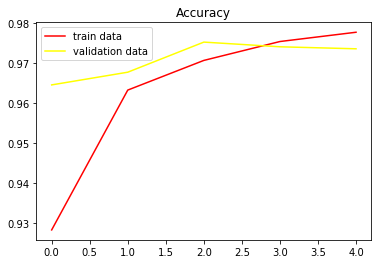

In [63]:
from matplotlib import pyplot as plt
epochs = history.epoch
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, color='red', label='train data')
plt.plot(epochs, val_acc, color='yellow', label='validation data')
plt.title('Accuracy')
plt.legend()
plt.show()

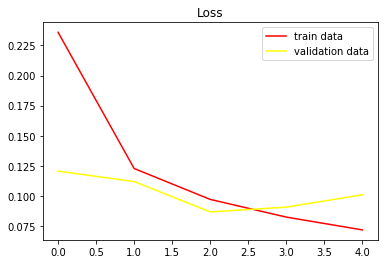

In [64]:
epochs = history.epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, color='red', label='train data')
plt.plot(epochs, val_loss, color='yellow', label='validation data')
plt.title('Loss')
plt.legend()
plt.show()

# Evaluate NN on unseen data

In [65]:
 model.evaluate(x_test, y_test, verbose=1)

10000/10000 [==============================] - 0s 37us/step


[0.08824941261925269, 0.9764]

# Using the Model

Now that we have a working, trained model, let’s put it to use. 

The first thing we’ll do is save it to disk so we can load it back up anytime:



In [0]:
model.save_weights('model.h5')

In [0]:
from keras.models import load_model
model.save('full_model.h5')

In [0]:
model1 = load_model('./full_model.h5')

In [69]:
predictions = model1.predict(x_test[:5])
predictions

array([[9.81469788e-13, 3.95107280e-11, 1.21047501e-08, 1.38923720e-10,
        6.98170634e-13, 1.20128853e-12, 2.25888980e-17, 9.99997854e-01,
        6.04053266e-11, 2.13108319e-06],
       [3.48768386e-21, 2.45340831e-11, 1.00000000e+00, 3.57293659e-15,
        2.66627444e-23, 2.14111148e-24, 2.56077084e-21, 2.75692338e-13,
        4.96200477e-16, 8.83747811e-21],
       [5.94153251e-15, 1.00000000e+00, 2.50776934e-11, 2.53017106e-16,
        2.31111606e-11, 6.20996647e-17, 1.65197056e-14, 1.43673337e-10,
        8.93712274e-12, 9.61253755e-13],
       [9.99976516e-01, 4.43876845e-11, 2.69404965e-09, 1.51615474e-11,
        1.81469915e-08, 4.58895595e-11, 2.33772662e-05, 9.67554301e-11,
        8.93120067e-09, 1.12413254e-07],
       [1.56302471e-09, 9.54811230e-10, 1.23672503e-10, 2.19503105e-12,
        9.99951243e-01, 4.64750391e-11, 2.52363602e-10, 1.48775872e-08,
        5.72255487e-09, 4.87727302e-05]], dtype=float32)

In [70]:
import numpy as np
np.argmax(predictions, axis=1)

array([7, 2, 1, 0, 4])

In [71]:
np.argmax(y_test[:5], axis=1)

array([7, 2, 1, 0, 4])

# Furhter improve

What we’ve covered so far was but a brief introduction - there’s much more we can do to experiment with and improve this network. 

**Tuning Hyperparameters**
A good hyperparameters to start with is the learning rate for the Adam optimizer. What happens when you increase or decrease it?

In [0]:
from keras.optimizers import Adam

model.compile(
  optimizer=Adam(lr=0.005),
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

What about the **batch size** and number of epochs?

In [73]:
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=20,
                    verbose=1,
                    validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 45us/step - loss: 0.1274 - acc: 0.9670 - val_loss: 0.1288 - val_acc: 0.9671
Epoch 2/20
48000/48000 [==============================] - 2s 34us/step - loss: 0.1127 - acc: 0.9692 - val_loss: 0.1288 - val_acc: 0.9682
Epoch 3/20
48000/48000 [==============================] - 2s 33us/step - loss: 0.1073 - acc: 0.9710 - val_loss: 0.1064 - val_acc: 0.9727
Epoch 4/20
48000/48000 [==============================] - 2s 34us/step - loss: 0.1086 - acc: 0.9711 - val_loss: 0.1345 - val_acc: 0.9701
Epoch 5/20
48000/48000 [==============================] - 2s 34us/step - loss: 0.1020 - acc: 0.9736 - val_loss: 0.1103 - val_acc: 0.9732
Epoch 6/20
48000/48000 [==============================] - 2s 33us/step - loss: 0.0913 - acc: 0.9761 - val_loss: 0.1407 - val_acc: 0.9664
Epoch 7/20
48000/48000 [==============================] - 2s 33us/step - loss: 0.0899 - acc: 0.9776 - val_loss: 0.1299 - val_acc

**Network Depth**

What happens if we remove or add more fully-connected layers? 

How does that affect training and/or the model’s final performance?

In [0]:
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(64, activation='relu'),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

**Activations**

What if we use an activation other than ReLU, e.g. sigmoid?

In [0]:
model = Sequential([
  Dense(64, activation='sigmoid', input_shape=(784,)),
  Dense(64, activation='sigmoid'),
  Dense(10, activation='softmax'),
])

**Dropout**

What if we tried adding Dropout layers, which are known to prevent overfitting?

In [0]:
from keras.layers import Dense, Dropout

model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dropout(0.5),
  Dense(64, activation='relu'),
  Dropout(0.5),
  Dense(10, activation='softmax'),
])